In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr
from sklearn.linear_model import LinearRegression

In [15]:
# read data from csv file
df = pd.read_csv('final_data/weather_history.csv')

In [16]:
df.head()

,date,temperature_2m,relative_humidity_2m,dew_point_2m,apparent_temperature,precipitation,rain,snowfall,snow_depth,weather_code,...,soil_temperature_0_to_7cm,soil_temperature_7_to_28cm,soil_temperature_28_to_100cm,soil_temperature_100_to_255cm,soil_moisture_0_to_7cm,soil_moisture_7_to_28cm,soil_moisture_28_to_100cm,soil_moisture_100_to_255cm,capital,country
0,2023-01-01 00:00:00,24.817001,87.862100,22.667000,29.228237,0.0,0.0,0.0,0.0,0.0,...,23.017000,26.867,26.567001,26.117,0.265,0.303,0.356,0.376,Abidjan,Ivory Coast
1,2023-01-01 01:00:00,24.017000,91.894440,22.617000,28.590828,0.0,0.0,0.0,0.0,0.0,...,22.817001,26.617,26.567001,26.117,0.266,0.303,0.356,0.376,Abidjan,Ivory Coast
2,2023-01-01 02:00:00,21.417000,97.876366,21.067001,25.501945,0.0,0.0,0.0,0.0,0.0,...,22.617000,26.367,26.567001,26.117,0.266,0.303,0.355,0.376,Abidjan,Ivory Coast
3,2023-01-01 03:00:00,21.267000,99.693840,21.217001,25.291786,0.0,0.0,0.0,0.0,3.0,...,22.767000,26.117,26.567001,26.117,0.266,0.303,0.355,0.376,Abidjan,Ivory Coast
4,2023-01-01 04:00:00,21.167000,100.000000,21.167000,24.795946,0.0,0.0,0.0,0.0,3.0,...,22.917000,25.917,26.567001,26.117,0.266,0.303,0.355,0.376,Abidjan,Ivory Coast


In [17]:
df[["apparent_temperature","wind_speed_10m", "wind_speed_100m"]]

,apparent_temperature,wind_speed_10m,wind_speed_100m
0,29.228237,6.109403,9.366919
1,28.590828,4.802999,8.311245
2,25.501945,2.276840,3.893995
3,25.291786,3.240000,0.720000
4,24.795946,5.771239,2.620839
...,...,...,...
1690675,6.518412,6.489992,20.240198
1690676,6.659613,10.383987,26.712873
1690677,6.997136,15.188417,31.452133
1690678,7.167986,16.516901,32.535713


In [18]:
wind_10m = df["wind_speed_10m"]
apparent_temperature = df["apparent_temperature"]
pressure_msl = df["pressure_msl"]

In [19]:
# group by session based on date
df['date'] = pd.to_datetime(df['date'])
df['month'] = df['date'].dt.month

df.groupby('month')['wind_speed_10m'].mean()

month
1     11.847024
2     12.449082
3     11.706385
4     11.190141
5     11.170837
6     11.039263
7     11.517121
8     11.028326
9     10.724589
10    10.796052
11    11.275358
12    11.378320
Name: wind_speed_10m, dtype: float64

In [20]:
monthly_wind_speed_std = df.groupby('month')['wind_speed_10m'].std()
monthly_wind_speed_std

month
1     7.539396
2     7.883983
3     7.254050
4     6.854623
5     6.842353
6     6.714411
7     7.136258
8     6.851088
9     6.925249
10    7.297920
11    7.552837
12    7.570760
Name: wind_speed_10m, dtype: float64

In [21]:
df.groupby('month')['wind_speed_10m'].mean()

month
1     11.847024
2     12.449082
3     11.706385
4     11.190141
5     11.170837
6     11.039263
7     11.517121
8     11.028326
9     10.724589
10    10.796052
11    11.275358
12    11.378320
Name: wind_speed_10m, dtype: float64

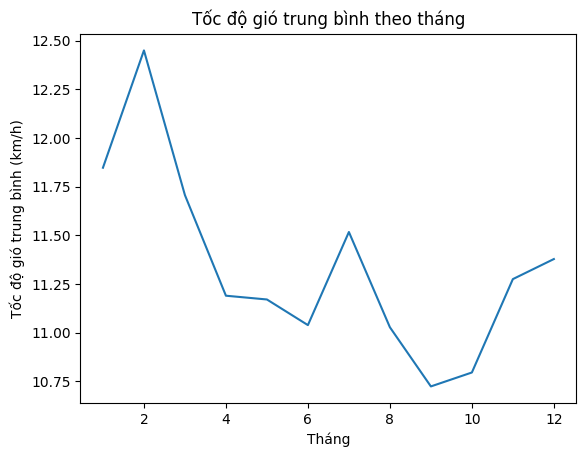

In [22]:
plt.plot(df.groupby('month')['wind_speed_10m'].mean().index, df.groupby('month')['wind_speed_10m'].mean())
plt.xlabel("Tháng")
plt.ylabel("Tốc độ gió trung bình (km/h)")
plt.title("Tốc độ gió trung bình theo tháng")
plt.show()

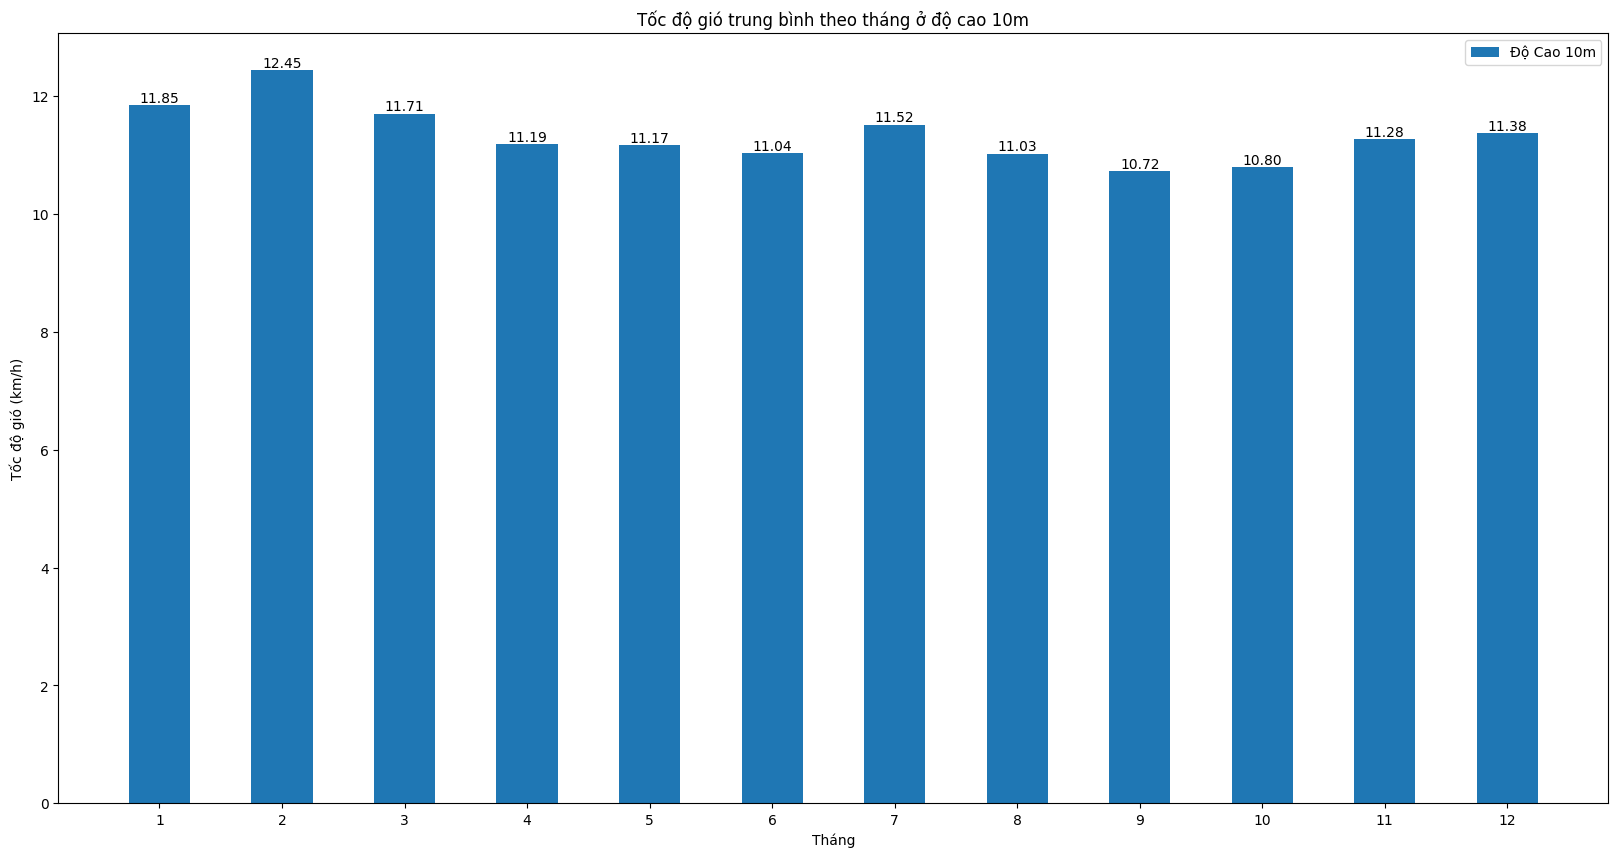

In [23]:
# group
wind_100m_group = df.groupby('month')['wind_speed_10m']

# Calculate means
mean_100m = wind_100m_group.mean()

# Sort the DataFrame by month
mean_100m = mean_100m.sort_index()

# Define the positions for each month
positions = range(1, len(mean_100m) * 2, 2)

# Plotting using bar plot
plt.figure(figsize=(20, 10))
bars = plt.bar([pos for pos in positions], mean_100m, width=1, label='Độ Cao 10m', align='center')

# Set x-axis ticks and labels
plt.xticks([pos for pos in positions], mean_100m.index)

# Add labels on top of each bar
for bar, value in zip(bars, mean_100m):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{value:.2f}', ha='center', va='bottom')

plt.title('Tốc độ gió trung bình theo tháng ở độ cao 10m')
plt.xlabel('Tháng')
plt.ylabel('Tốc độ gió (km/h)')
plt.legend()
plt.show()


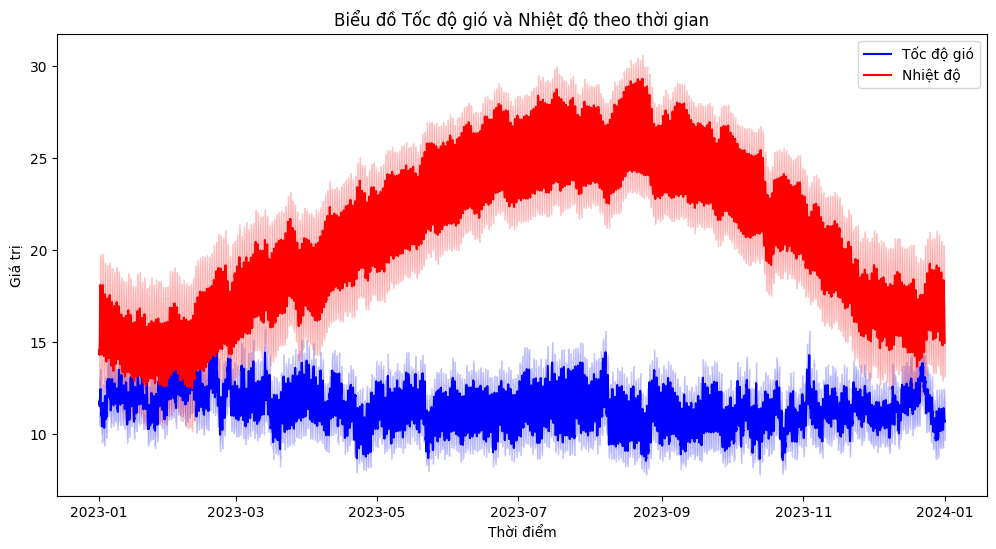

In [24]:
# Chuyển đổi cột 'Thời điểm' sang định dạng datetime để làm việc với thời gian
df['date'] = pd.to_datetime(df['date'])

# Tạo biểu đồ tốc độ gió theo thời gian
plt.figure(figsize=(12, 6))
sns.lineplot(x='date', y=wind_10m, data=df, label='Tốc độ gió', color='blue')

# Tạo biểu đồ nhiệt độ theo thời gian (để phân tích liên kết với tốc độ gió)
sns.lineplot(x='date', y=apparent_temperature, data=df, label='Nhiệt độ', color='red')

# Thêm các thông tin khác vào biểu đồ nếu cần thiết

# Đặt tiêu đề và nhãn trục
plt.title('Biểu đồ Tốc độ gió và Nhiệt độ theo thời gian')
plt.xlabel('Thời điểm')
plt.ylabel('Giá trị')

# Hiển thị chú thích
plt.legend()

# Hiển thị biểu đồ
plt.show()


In [25]:
pearson_corr = wind_10m.corr(apparent_temperature)
print(f'Hệ số tương quan Pearson: {pearson_corr}')

pearson_corr_wind_pressure = wind_10m.corr(pressure_msl)
print(f'Hệ số tương quan Pearson giữa Tốc độ gió và Áp suất: {pearson_corr_wind_pressure}')

Hệ số tương quan Pearson: -0.03665878894749894
Hệ số tương quan Pearson giữa Tốc độ gió và Áp suất: -0.15626868572836775


In [26]:
# Kiểm định t tương quan
correlation_coefficient, p_value = pearsonr(df['wind_speed_10m'], df['apparent_temperature'])
print(f'Hệ số tương quan Pearson: {correlation_coefficient}, p-value: {p_value}')

Hệ số tương quan Pearson: -0.03665878894750145, p-value: 0.0
